In [7]:
############ Importing Packages First #################
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import os
import numpy as np
import utils
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as stats_api
import pytz
pst_tz = pytz.timezone('America/Los_Angeles')
############ Importing Packages First #################

# Set up the path for files #
directory = 'C:/Project 5 Twitter/'
tweetfeatures = ['Number of tweets', 'Total number of retweets', 'Total number of followers',
                 'Maximum number of followers', 'Hour of the day', 'Total tweets by Author',
                 'Author Passivity', 'Impression Count', 'Ranking Score', 'Mention Count',
                 'Graph Density', 'Avg Graph Degree']
tweettags = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

In [8]:
# Using class to call all questions
class tweets():
    
    def tweetstats(self, hashtag):

        file_name = 'tweets_#' + hashtag + '.txt'
        citation_date   = []
        followers  = []
        retweets   = []
        tweetcount = 0
        
        lines = open(directory + file_name, 'r', encoding='utf8')

        for i, line in enumerate(lines):
            tweet = json.loads(line)
            tweetcount = tweetcount + 1
            citation_date.append(datetime.fromtimestamp(tweet['citation_date'], pst_tz))
            
            followers.append(tweet['author']['followers'])
            retweets.append(tweet['metrics']['citations']['total'])

        df = pd.DataFrame(citation_date, columns=['time']).set_index('time')
        tweets_by_hour = df.groupby(pd.Grouper(freq='60Min'))
        count_by_hour = [len(val) for key, val in tweets_by_hour]
        total_hours = len(tweets_by_hour)
        
        print("Avg # of tweets per hour", len(citation_date) / total_hours)
        print("Avg # of followers - ", np.mean(followers))
        print("Avg # of retweets - ", np.mean(retweets))
        print("Tweetcounts -", tweetcount)
        print("First time of Tweet                  :", min(citation_date))
        print("Last  time of Tweet                  :", max(citation_date))

        if hashtag in ['gohawks', 'gopatriots', 'nfl', 'patriots', 'sb49', 'superbowl']:         
            plt.figure(figsize=(15,10))
            plt.grid(zorder=0)
            plt.style.use('dark_background')
            plt.bar(range(len(tweets_by_hour.groups.keys())), count_by_hour,width=1,color = 'r',align='center')
            plt.xlabel('Hour',fontsize=20)
            plt.ylabel('# of tweets',fontsize=20)
            plt.title('# of tweets per hour' + ' ' + hashtag,fontsize=20)
            plt.xticks(fontsize=20,color='white')
            plt.yticks(fontsize=20,color='white')
            plt.show()


 Printing for  gohawks
Avg # of tweets per hour 292.09326424870466
Avg # of followers -  2217.9237355281984
Avg # of retweets -  2.0132093991319877
Tweetcounts - 169122
First time of Tweet                  : 2015-01-14 00:04:41-08:00
Last  time of Tweet                  : 2015-02-07 02:17:49-08:00


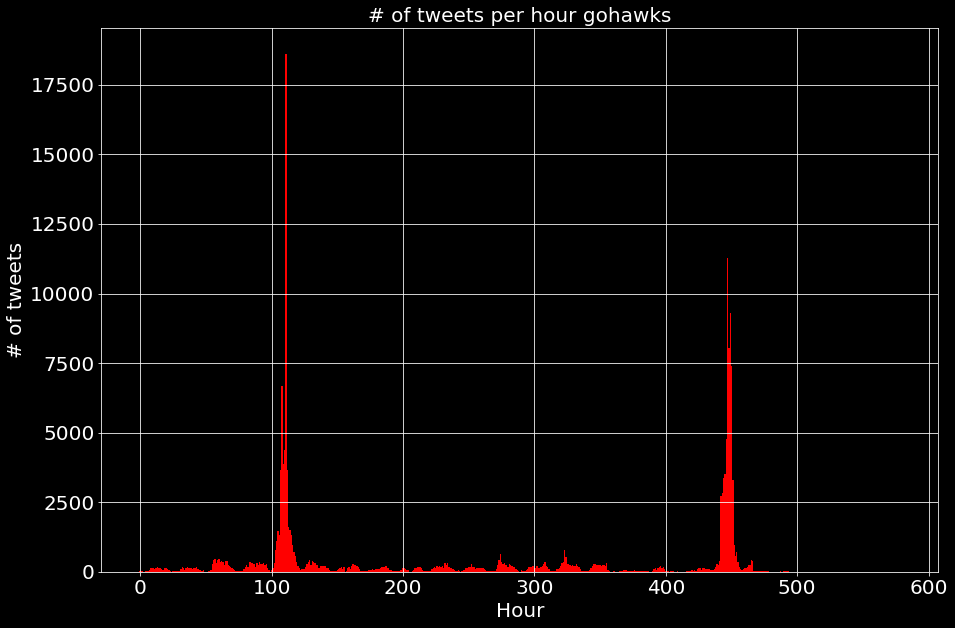


 Printing for  gopatriots
Avg # of tweets per hour 40.888695652173915
Avg # of followers -  1427.2526051635405
Avg # of retweets -  1.4081919101697078
Tweetcounts - 23511
First time of Tweet                  : 2015-01-14 01:50:11-08:00
Last  time of Tweet                  : 2015-02-06 23:54:35-08:00


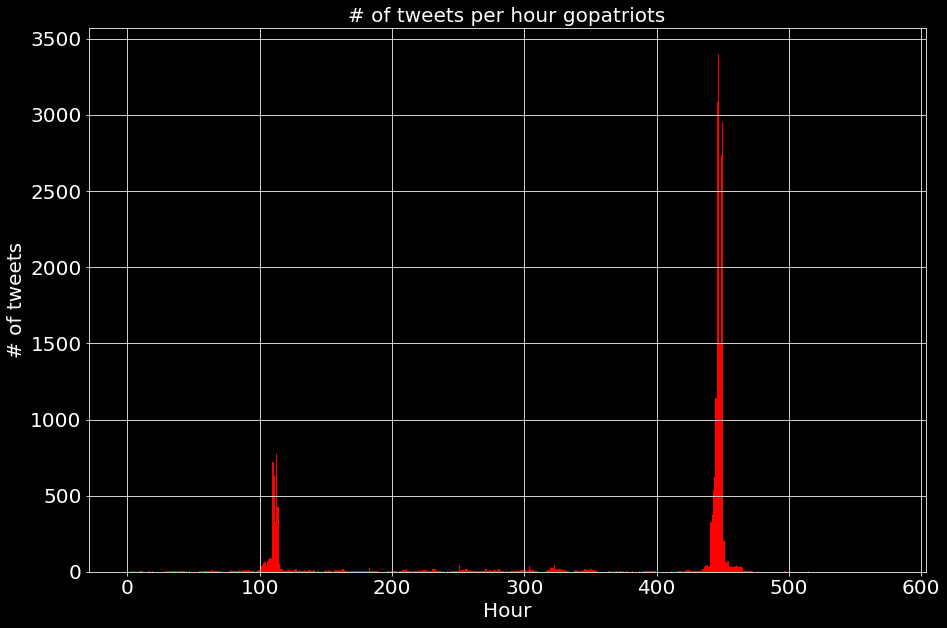


 Printing for  nfl
Avg # of tweets per hour 396.97103918228277
Avg # of followers -  4662.37544523693
Avg # of retweets -  1.5344602655543254
Tweetcounts - 233022
First time of Tweet                  : 2015-01-14 00:00:04-08:00
Last  time of Tweet                  : 2015-02-07 10:55:36-08:00


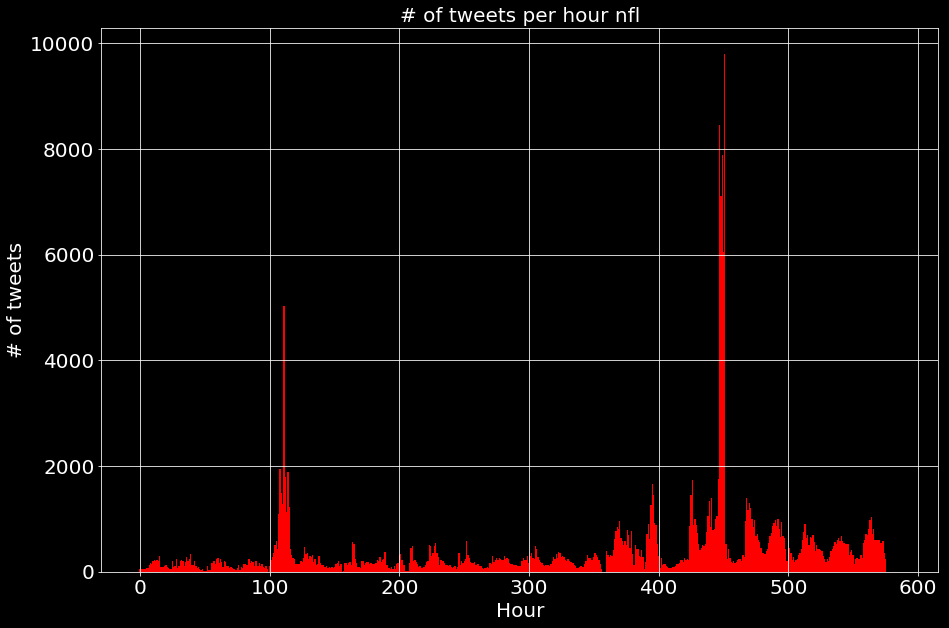


 Printing for  patriots
Avg # of tweets per hour 750.6320272572402
Avg # of followers -  3280.4635616550277
Avg # of retweets -  1.7852871288476946
Tweetcounts - 440621
First time of Tweet                  : 2015-01-14 00:07:18-08:00
Last  time of Tweet                  : 2015-02-07 10:55:00-08:00


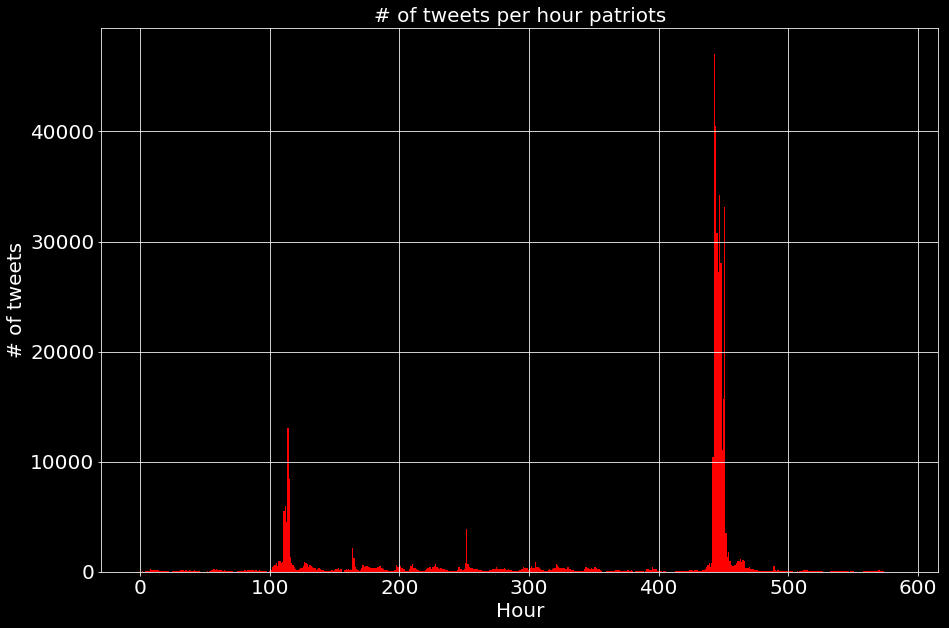


 Printing for  sb49
Avg # of tweets per hour 1275.5557461406518
Avg # of followers -  10374.160292019487
Avg # of retweets -  2.52713444111402
Tweetcounts - 743649
First time of Tweet                  : 2015-01-14 04:31:15-08:00
Last  time of Tweet                  : 2015-02-07 10:55:36-08:00


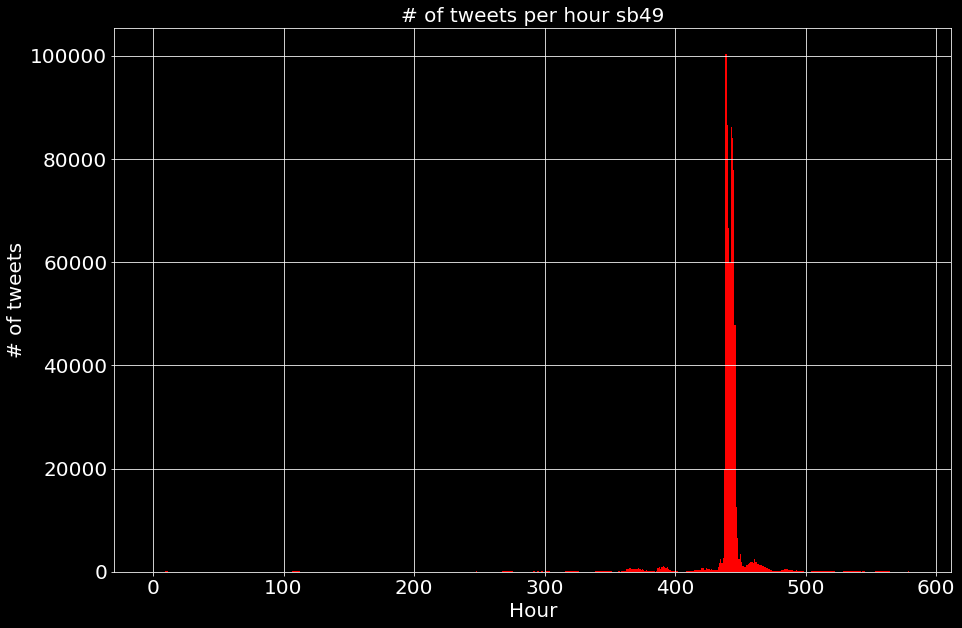


 Printing for  superbowl
Avg # of tweets per hour 2067.824531516184
Avg # of followers -  8814.96799424623
Avg # of retweets -  2.3911895819207736
Tweetcounts - 1213813
First time of Tweet                  : 2015-01-14 00:13:07-08:00
Last  time of Tweet                  : 2015-02-07 10:00:08-08:00


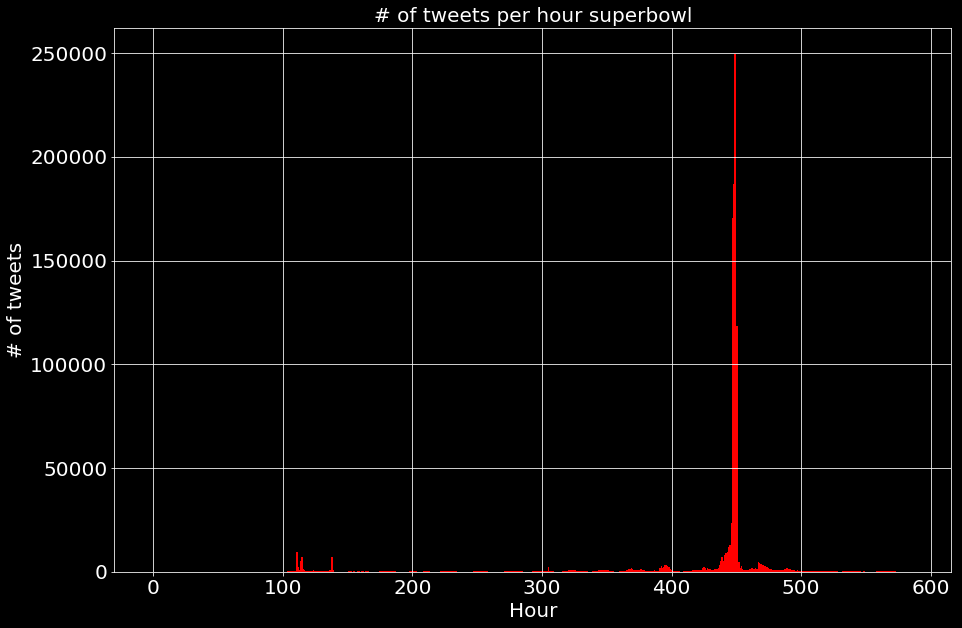

In [9]:
#Question 1 and 2
for tag in tweettags:
    print("\n Printing for ", tag)
    tweets().tweetstats(tag)